<a href="https://colab.research.google.com/github/LincolnVS/ImersaoDadosAlura/blob/main/Aula_04_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O notebook da Aula 4 foi separado em duas etapas:
- [Explicações e Aula Alura](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_04.ipynb)
- [Desafios e Playground](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_04_Desafios.ipynb)

*Obs:* Esse é o notebook de **Desafios e Playground**

### Importando dados

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 15) #mostra apenas 15 colunas quando manda plotar tudo (esse dataset tem mais de 800)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use(style='seaborn-darkgrid')#('fivethirtyeight')
sns.set()

url_dados = 'https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

In [2]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [84]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,...,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,...,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,...,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,...,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,...,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,...,0,0,0,0,0,1,True


In [85]:
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


# Desafios 

- *Desafio 01*: Encontrar o top 10, das ações do MOA (inibidor, agonista...)
- *Desafio 02*: Criar a coluna eh_controle para quando na linha tratamento == com_controle
- *Desafio 03*: Criar três colunas para indicar o tempo 24, 48, 72
- *Desafio 04*: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- *Desafio 05*: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)
- *Desafio 06*: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA 
- *Desafio 07*: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes
- *Desafio 08*: Resumo do que você aprendeu com os dados

## Desafio 1

**Encontrar o top 10, das ações do MOA (inibidor, agonista...)**

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
steroid                1
stimulant              1
antibiotic             1
anti-inflammatory      1
dtype: int64


[]

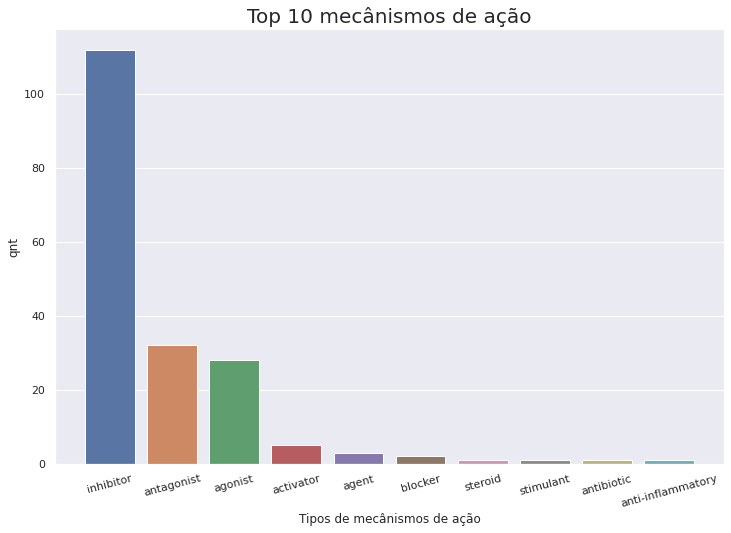

In [86]:
#Top possibilidades de ações
dados_acoes = dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1)
acao = [linha.split('_')[-1] for linha in dados_acoes.columns]
acao = pd.Series(acao)
top_10_acao = acao.value_counts()[0:10]
print(top_10_acao)

plt.figure(figsize=(12,8))
ax = sns.barplot(x = top_10_acao.index, y = top_10_acao.values)
ax.set(xlabel = 'Tipos de mecânismos de ação', ylabel = 'qnt')
ax.set_title('Top 10 mecânismos de ação', fontdict = {'fontsize':20})
plt.xticks(rotation=15)
plt.plot()

                      1
0                      
inhibitor          9693
antagonist         3449
agonist            2330
controle           1866
blocker             323
agent               150
activator           115
local                80
antioxidant          73
anti-inflammatory    73


[]

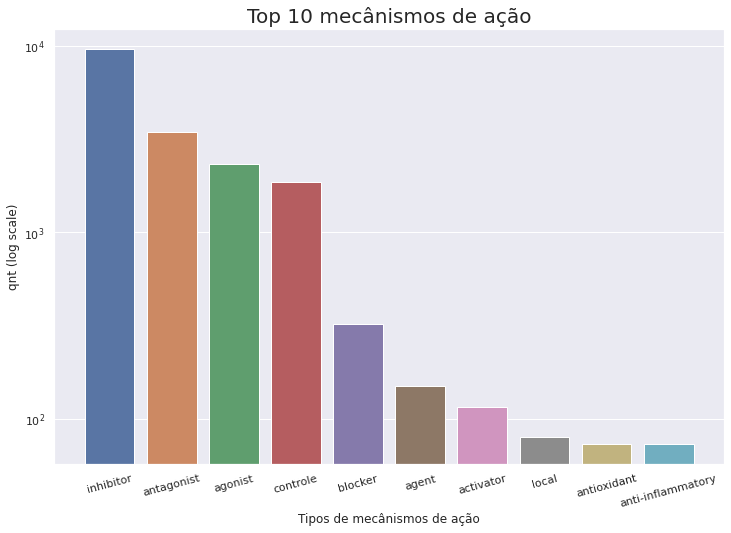

In [70]:
#Top açoes que mais aconteceram
dados_acoes = dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1)
aux_acao = [[colum_name.split('_')[-1], dados_acoes[colum_name].sum()] for colum_name in dados_acoes.columns]
acao = pd.DataFrame(aux_acao).groupby(0).agg('sum').sort_values(by=[1],ascending=False)
top_10_acao = acao.iloc[0:10,:]
print(top_10_acao)

plt.figure(figsize=(12,8))
ax = sns.barplot(x = top_10_acao.index, y = top_10_acao.values.flatten())
ax.set(xlabel = 'Tipos de mecânismos de ação', ylabel = 'qnt (log scale)')
ax.set_title('Top 10 mecânismos de ação', fontdict = {'fontsize':20})
plt.xticks(rotation=15)
ax.set_yscale("log")
plt.plot()

## Desafio 2

**Criar a coluna eh_controle para quando na linha tratamento == com_controle**

In [89]:
dados_resultados['eh_controle'] = (dados['tratamento'] == 'com_controle')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,...,wnt_inhibitor,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72,eh_controle
0,id_000644bb2,0,0,0,0,0,0,...,0,1,True,1,0,0,False
1,id_000779bfc,0,0,0,0,0,0,...,0,0,False,0,0,1,False
2,id_000a6266a,0,0,0,0,0,0,...,0,3,True,0,1,0,False
3,id_0015fd391,0,0,0,0,0,0,...,0,0,False,0,1,0,False
4,id_001626bd3,0,0,0,0,0,0,...,0,1,True,0,0,1,False


## Desafio 3

**Criar três colunas para indicar o tempo 24, 48, 72**

In [72]:
dados_resultados['tempo_24'] = (dados_combinados['tempo'] == 24)
dados_resultados['tempo_48'] = (dados_combinados['tempo'] == 48)
dados_resultados['tempo_72'] = (dados_combinados['tempo'] == 72)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,...,wnt_inhibitor,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,0,0,0,0,0,0,...,0,1,True,False,True,False,False
1,id_000779bfc,0,0,0,0,0,0,...,0,0,False,False,False,False,True
2,id_000a6266a,0,0,0,0,0,0,...,0,3,True,False,False,True,False
3,id_0015fd391,0,0,0,0,0,0,...,0,0,False,False,False,True,False
4,id_001626bd3,0,0,0,0,0,0,...,0,1,True,False,False,False,True


In [87]:
dados_resultados[['tempo_24','tempo_48','tempo_72']] = pd.get_dummies(dados_combinados['tempo'])
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,...,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72
0,id_000644bb2,0,0,0,0,0,0,...,0,0,1,True,1,0,0
1,id_000779bfc,0,0,0,0,0,0,...,0,0,0,False,0,0,1
2,id_000a6266a,0,0,0,0,0,0,...,0,0,3,True,0,1,0
3,id_0015fd391,0,0,0,0,0,0,...,0,0,0,False,0,1,0
4,id_001626bd3,0,0,0,0,0,0,...,0,0,1,True,0,0,1


## Desafio 4

**Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html**

In [91]:
result = pd.concat([dados, dados_resultados])
result.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,wnt_inhibitor,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72,eh_controle
0,id_000644bb2,com_droga,24.0,D1,b68db1d53,1.0620,0.5577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_000779bfc,com_droga,72.0,D1,df89a8e5a,0.0743,0.4087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_000a6266a,com_droga,48.0,D1,18bb41b2c,0.6280,0.5817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_0015fd391,com_droga,48.0,D1,8c7f86626,-0.5138,-0.2491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_001626bd3,com_droga,72.0,D2,7cbed3131,-0.3254,-0.4009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
result = pd.concat([dados, dados_resultados], join="inner") 
result.head()
#unica coisa igual entre os 2 é o id ahhaha

,id
0,id_000644bb2
1,id_000779bfc
2,id_000a6266a
3,id_0015fd391
4,id_001626bd3


In [94]:
result = dados.append(dados_resultados)
result.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,wnt_inhibitor,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72,eh_controle
0,id_000644bb2,com_droga,24.0,D1,b68db1d53,1.0620,0.5577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_000779bfc,com_droga,72.0,D1,df89a8e5a,0.0743,0.4087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_000a6266a,com_droga,48.0,D1,18bb41b2c,0.6280,0.5817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_0015fd391,com_droga,48.0,D1,8c7f86626,-0.5138,-0.2491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_001626bd3,com_droga,72.0,D2,7cbed3131,-0.3254,-0.4009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Desafio 5

**Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)**

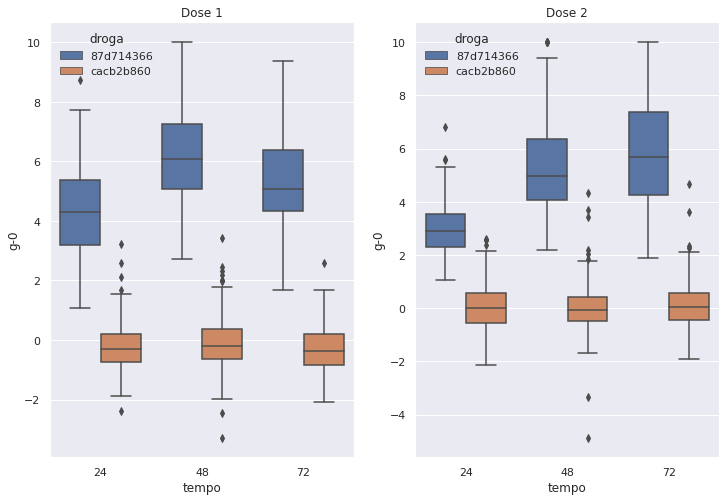

In [144]:
composto = dados_combinados[dados_combinados['droga']=='87d714366']
controle = dados_combinados[dados_combinados['tratamento']=='com_controle']

dados_concat = pd.concat([composto,controle])

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax = sns.boxplot(data = dados_concat[dados_concat['dose'] == 'D1'], y= 'g-0', x='tempo', hue='droga')
ax.set_title('Dose 1')
plt.subplot(1,2,2)
ax = sns.boxplot(data = dados_concat[dados_concat['dose'] == 'D2'], y= 'g-0', x='tempo', hue='droga')
ax.set_title('Dose 2')
plt.show()

[]

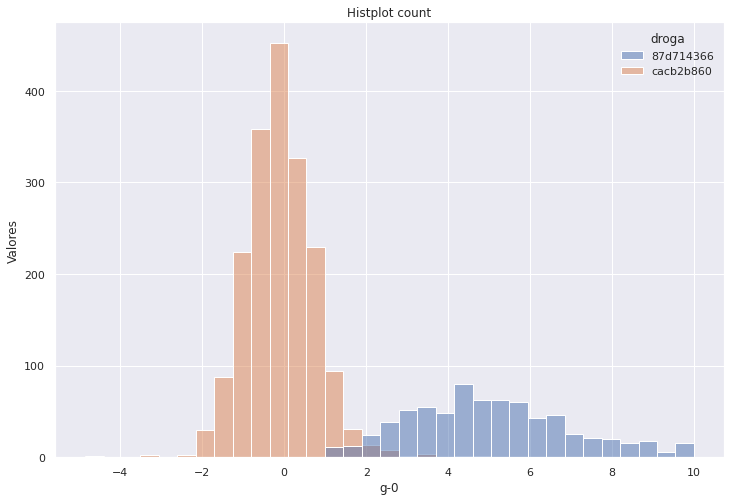

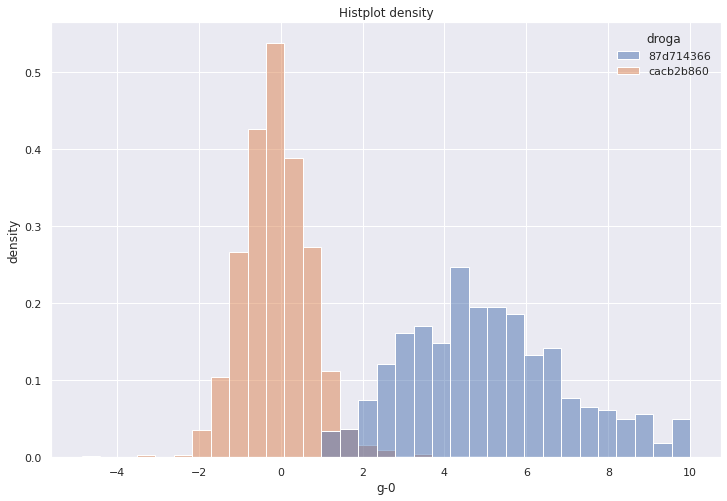

In [145]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=dados_concat,x='g-0',hue='droga')
ax.set_title('Histplot count')
ax.set_ylabel("Valores")
ax.set_xlabel('g-0')
plt.plot()

plt.figure(figsize=(12,8))
ax = sns.histplot(data=dados_concat,x='g-0',hue='droga', common_norm=False,stat='density')
ax.set_title('Histplot density')
ax.set_ylabel("density")
ax.set_xlabel('g-0')
plt.plot()

## Desafio 6

**Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA**

In [202]:
 dados_n_combinados = pd.merge(dados[['id','droga']], dados_resultados.drop(['ativo_moa', 'tempo_24', 'tempo_48',
       'tempo_72','eh_controle'],axis=1), on='id')
 dados_n_combinados.head()

drogas = dados_n_combinados['droga'].unique()
for d in drogas:
  dados_droga = dados_n_combinados.query(f'droga == "{d}"')
  n_valores = dados_droga['n_moa'].value_counts().index[0]

  acoes = dados_droga.drop(['n_moa'],axis=1).columns[dados_droga.drop(['n_moa'],axis=1).isin([1]).any()].values
  n_acoes = len(acoes)

  if (n_valores != n_acoes):
    print(f"A droga {d} mudou de ativos")
    print(f'n_moa {n_valores}, n_acao {n_acoes}, acoes {acoes}')

# Contamos todas as colunas moa que foram ativadas, 
#e comparamos com o valor moa encontrado, se for igual, significa que somente essas moas foram ativads.

## Desafio 7

**Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes**

In [ ]:
 dados_n_combinados = pd.merge(dados[['id','droga']], dados_resultados.drop(['ativo_moa', 'tempo_24', 'tempo_48',
       'tempo_72','eh_controle'],axis=1), on='id')
 dados_n_combinados.head()

drogas = dados_n_combinados['droga'].unique()
for d in drogas:
  dados_droga = dados_n_combinados.query(f'droga == "{d}"')
  n_valores = dados_droga['n_moa'].value_counts().index[0]

  acoes = dados_droga.drop(['n_moa'],axis=1).columns[dados_droga.drop(['n_moa'],axis=1).isin([1]).any()].values
  n_acoes = len(acoes)

  if (n_valores != n_acoes):
    print(f"A droga {d} mudou de ativos")
    print(f'n_moa {n_valores}, n_acao {n_acoes}, acoes {acoes}')

# Contamos todas as colunas moa que foram ativadas, 
#e comparamos com o valor moa encontrado, se for igual, significa que somente essas moas foram ativads.

## Desafio 8

**Resumo do que você aprendeu com os dados**

- Aprendemos a fazer merge de datasets diferentes mas que tem uma coluna em comum (coluna id)
- Possivelmente, o MOA é característico do composto visto que independentemente de uma dose ou o tempo, o composto ativa o mesmos MOA's. Mesmo tendo diferentes g e c.